In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/Customer Churn.csv")

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5043,4325-NFSKC,Male,1,No,No,19,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.60,1660,Yes
4275,2692-PFYTJ,Female,0,No,No,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.75,25.75,No
342,7520-HQWJU,Female,0,Yes,Yes,66,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),67.45,4508.65,No
1566,4751-ERMAN,Male,0,Yes,Yes,72,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),75.40,5480.25,No
5694,0983-TATYJ,Female,0,Yes,No,33,Yes,No,DSL,No,...,No,Yes,No,No,One year,Yes,Mailed check,51.45,1758.9,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#replacing the blanks with zero  and converting the datatype of   TotalCharges

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df[df.duplicated()].sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
def convert(value):
  if value==1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(convert)


In [17]:
#converted 0 and 1 of senior citizen to yes or no for easier to understand

In [16]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6711,3545-CNWRG,Female,no,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,4889.20,No
2874,8347-GDTMP,Female,no,Yes,No,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1225.65,No
4400,5215-LNLDJ,Female,no,Yes,Yes,7,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.70,149.05,No
4360,2675-OTVVJ,Male,yes,Yes,No,31,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.45,2807.65,No
4249,7919-ZODZZ,Female,no,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No


In [19]:
# PERCENTAGE OF CUSTOMER CHURN OUT ANALYSIS


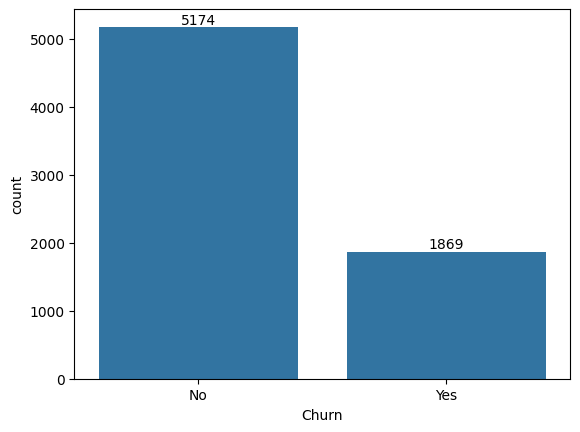

In [24]:
ax = sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.show()

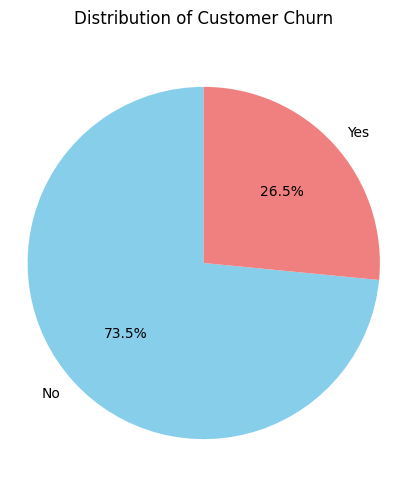

In [28]:
# Calculate the value counts for the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Customer Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
#from the given pie chart we can figure out that our 26.5% customers has churn out now let find the reason behind it

In [30]:
#REASON

<Axes: xlabel='gender', ylabel='count'>

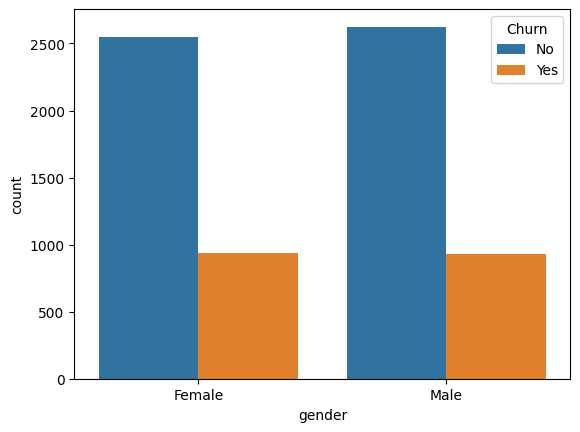

In [31]:
sns.countplot(x="gender",data=df,hue="Churn")

not the gender specific

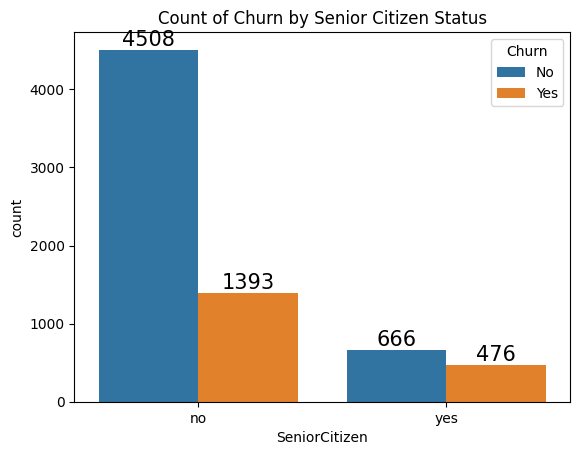

In [42]:
ax = sns.countplot(x="SeniorCitizen",data=df,hue="Churn")

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=15)

plt.title('Count of Churn by Senior Citizen Status')
plt.show()

comparative a greater number of people in senior category have churned out

<Axes: xlabel='tenure', ylabel='Count'>

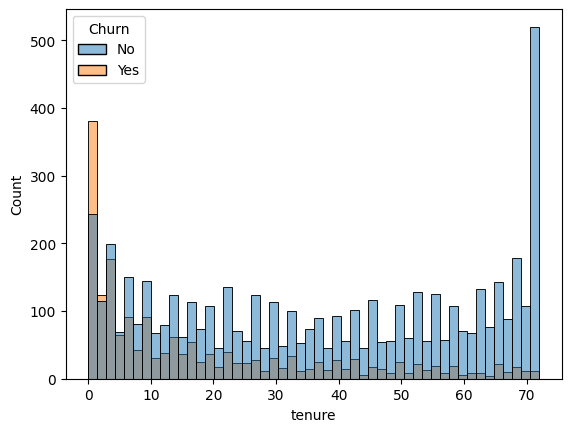

In [46]:
sns.histplot(x="tenure",data=df, bins=50,hue="Churn")

#people who have used  our services for a long have stayed and people  who have used our services  for 1 or 2 months have churned out

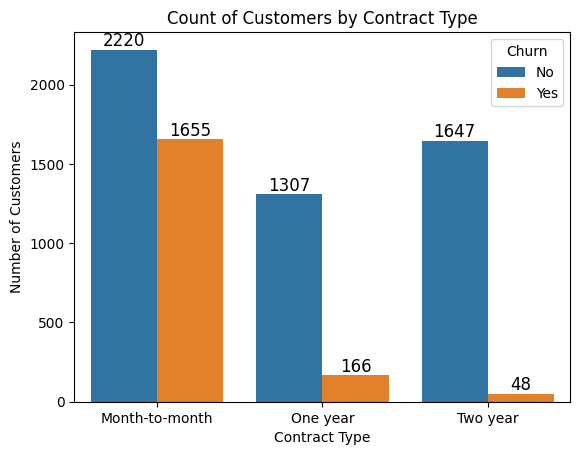

In [50]:
ax = sns.countplot(x="Contract",data=df, hue="Churn")

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.title('Count of Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

month to month contract have more likely to churn out than people  who have one year  and two year contract

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

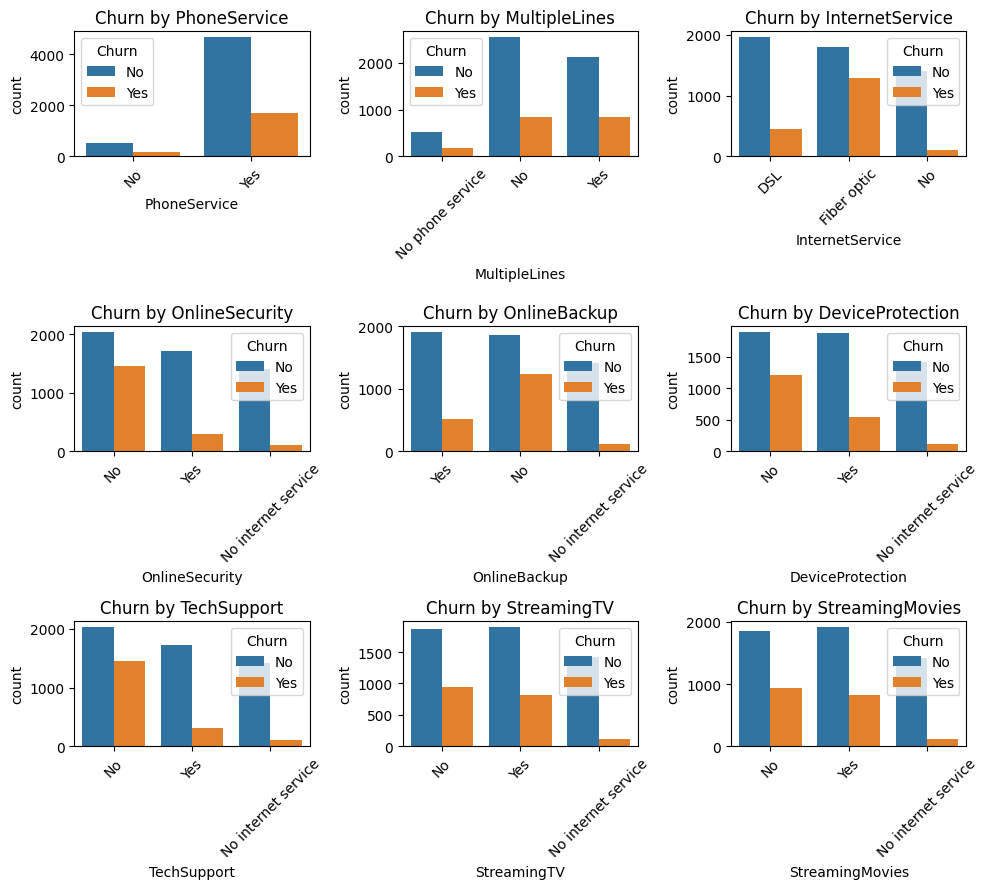

In [58]:
service_columns = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(service_columns) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3)) # Reduced figsize
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create a countplot for each service column
for i, col in enumerate(service_columns):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotate labels if needed

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Customers lacking support services (like tech support, online security, and backup) tend to churn more.
Fiber optic internet users show higher churn compared to DSL.
Entertainment services (Streaming TV/Movies) have little effect on churn.
Support features play a key role in customer retention.


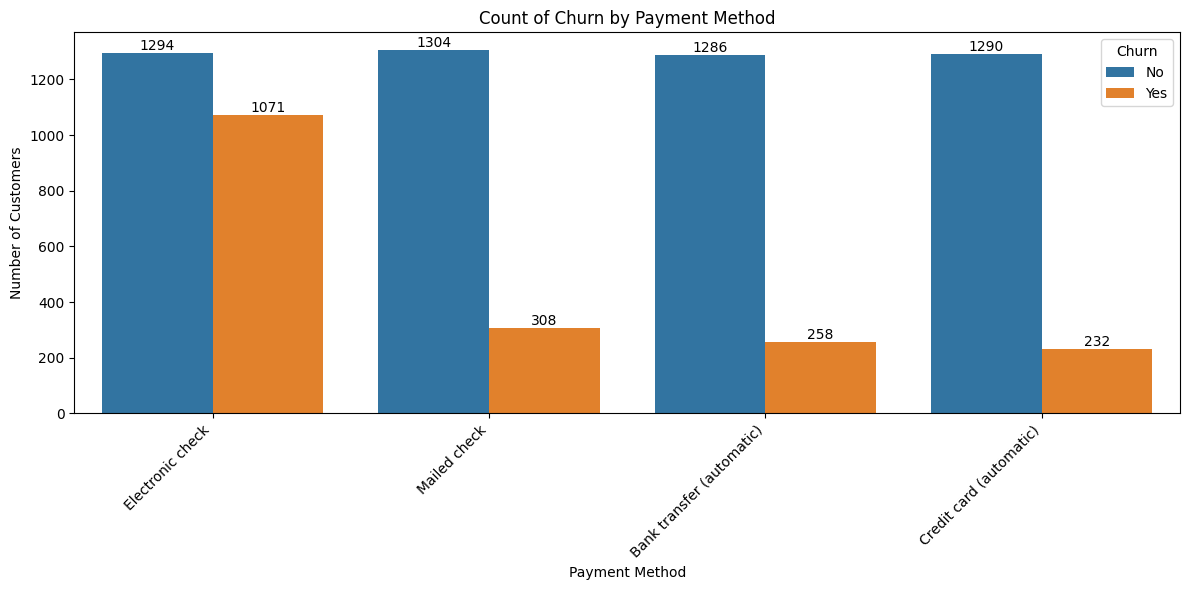

In [60]:
plt.figure(figsize=(12, 6)) # Increased width
ax = sns.countplot(x="PaymentMethod",data=df,hue="Churn")

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Count of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Customers using electronic checks have the highest churn rate.
Automatic payment methods like bank transfer and credit card show significantly lower churn.
Mailed checks also have lower churn compared to electronic checks.